In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 交叉表和透视表

- 交叉表：

  交叉表用于计算一列数据对于另外一列数据的分组个数(用于统计分组频率的特殊透视表)

  - pd.crosstab(value1, value2)

- 透视表：

  透视表是将原有的DataFrame的列分别作为行索引和列索引，然后对指定的列应用聚集函数

  - data.pivot_table(）

- - DataFrame.pivot_table([], index=[])

# 交叉表

In [2]:
# 加载数据
data = pd.read_csv("./data/stock_day.csv")
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76


- 获取每一天是周几

In [3]:
# 获取索引
data.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [4]:
# 转换索引为日期类型
time = pd.to_datetime(data.index)
time

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [5]:
# 获取周几
time.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

- 添加一列

In [6]:
# 添加周几这一列  和字典添加方式相同
data['week'] = time.weekday
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1


In [19]:
np.where(data['p_change'] > 0, 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

- 添加涨跌列

In [7]:
# 区分股票涨和跌 p_change大于0 涨  小于0 跌
data['p_n'] = np.where(data['p_change'] > 0, 1, 0)
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,p_n
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2,1
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1,1


In [8]:
# 通过交叉表寻找两个数据关系 把前一个当index 后一个当colums
# 注意 两个数据的index需要相同 
count = pd.crosstab(data['week'], data['p_n'])
count

p_n,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [21]:
type(count)

pandas.core.frame.DataFrame

In [9]:
data['week']

2018-02-27    1
2018-02-26    0
2018-02-23    4
2018-02-22    3
2018-02-14    2
             ..
2015-03-06    4
2015-03-05    3
2015-03-04    2
2015-03-03    1
2015-03-02    0
Name: week, Length: 643, dtype: int64

In [10]:
data['p_n']

2018-02-27    1
2018-02-26    1
2018-02-23    1
2018-02-22    1
2018-02-14    1
             ..
2015-03-06    1
2015-03-05    1
2015-03-04    1
2015-03-03    1
2015-03-02    1
Name: p_n, Length: 643, dtype: int32

In [23]:
# 对于星期一到星期五总天数求和
sum = count.sum(axis=1).astype(np.float32)
sum

week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [12]:
# 计算涨跌的比例
# type(count)
# type(sum)

In [25]:
count.div(sum,axis=0)

p_n,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


In [26]:
pro = count.div(sum,axis=0)
type(pro)

pandas.core.frame.DataFrame

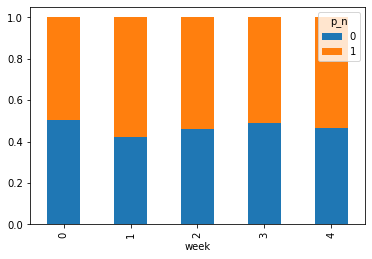

In [28]:
# 显示柱状图
pro.plot(kind='bar', stacked=True)
plt.show()

# 透视表

透视表可以把上述操作简化

In [16]:
# 通过透视表，将整个过程变成更简单一些(结果为1的数据)
data.pivot_table(['p_n'], index='week')

,p_n
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433
